In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h2>Loading The Dataset</h2>

Load the .csv file into a dataframe and get an overall look at the dataset

In [8]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [9]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [13]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [14]:
249/4861

0.051224027977782347

Its clear that it is an <b>Imbalanced classification</b> problem

<h2>Data Visualization</h2>

Using barplots and boxplots to analyze the correlation between different the features and the target 

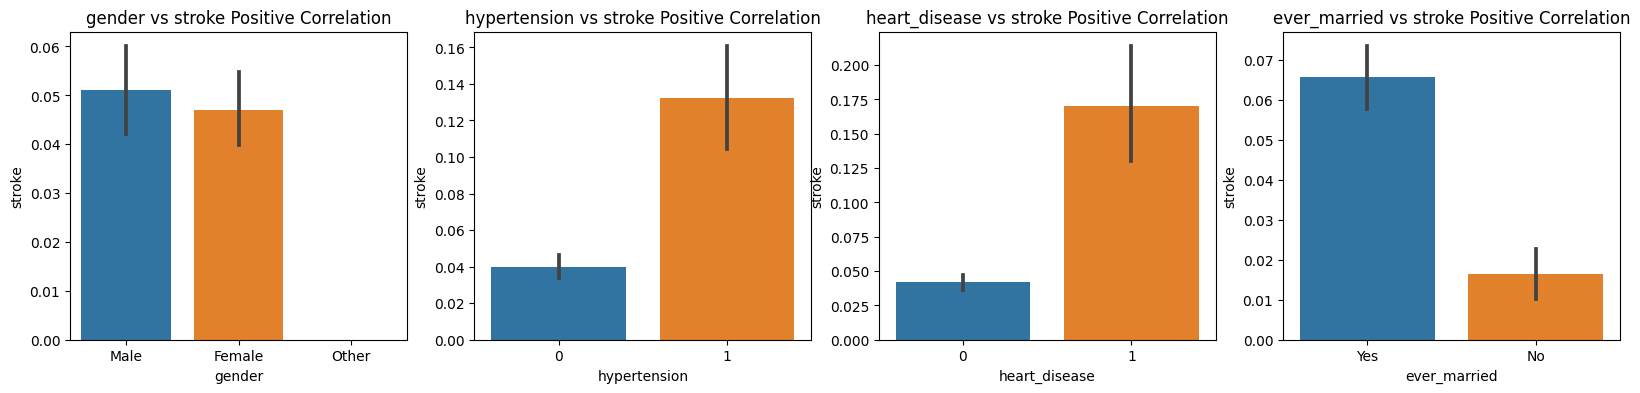

In [15]:
pos = ['gender', 'hypertension', 'heart_disease', 'ever_married']

f, axes = plt.subplots(ncols=4, figsize=(20, 4))
for i,j in enumerate(pos):
    sns.barplot(x=j, y='stroke', data=data, ax=axes[i])
    axes[i].set_title(j+' vs stroke Positive Correlation')

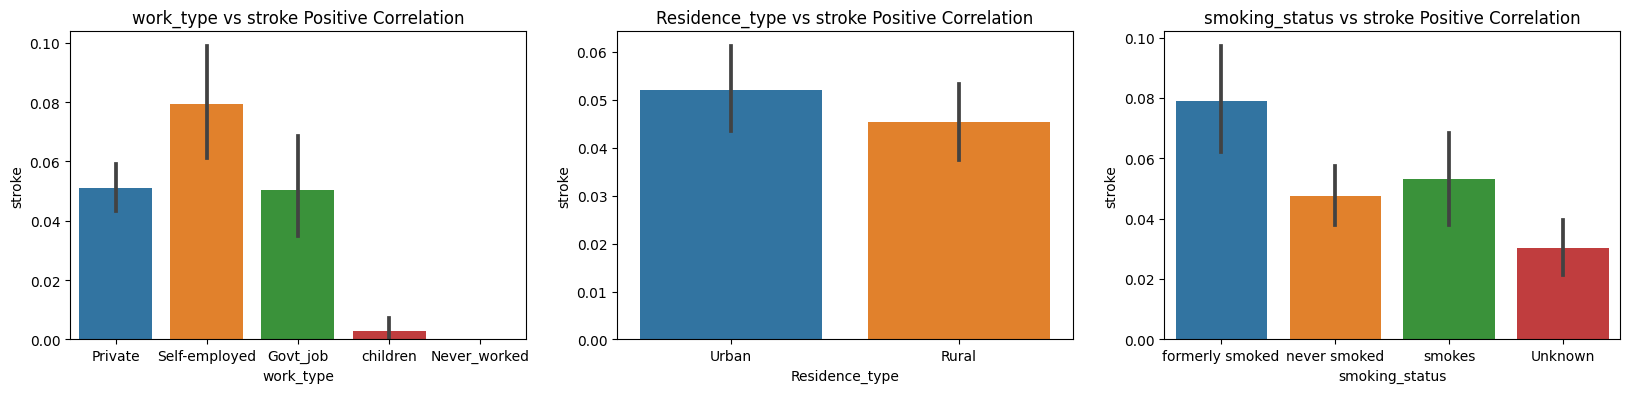

In [16]:
pos = ['work_type', 'Residence_type', 'smoking_status']

f, axes = plt.subplots(ncols=3, figsize=(20, 4))
for i,j in enumerate(pos):
    sns.barplot(x=j, y='stroke', data=data, ax=axes[i])
    axes[i].set_title(j+' vs stroke Positive Correlation')

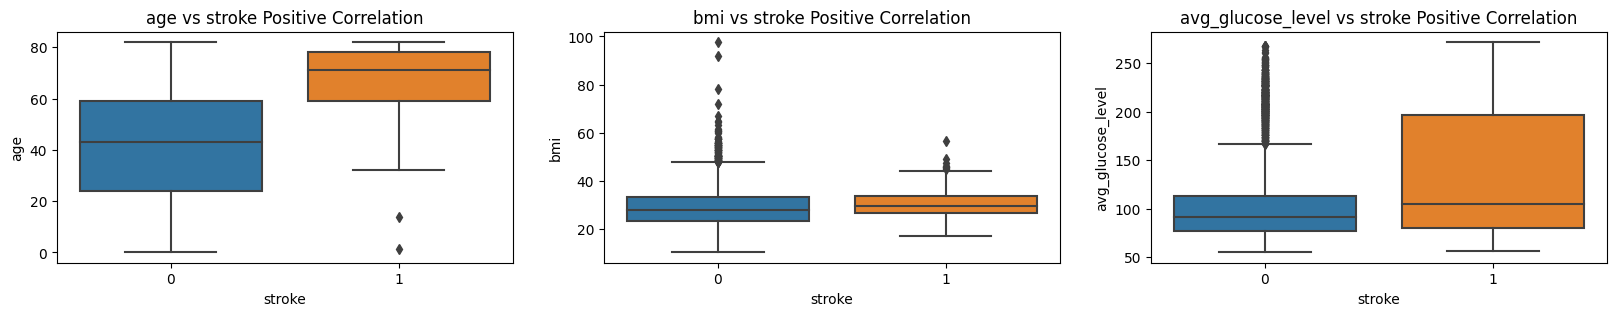

In [17]:
pos = ['age', 'bmi', 'avg_glucose_level']

f, axes = plt.subplots(ncols=3, figsize=(20, 3))
for i,j in enumerate(pos):
    sns.boxplot(x='stroke', y=j, data=data, ax=axes[i])
    axes[i].set_title(j+' vs stroke Positive Correlation')


C:\Users\DELL\AppData\Local\Temp\ipykernel_5016\3305868029.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm')


<Axes: >

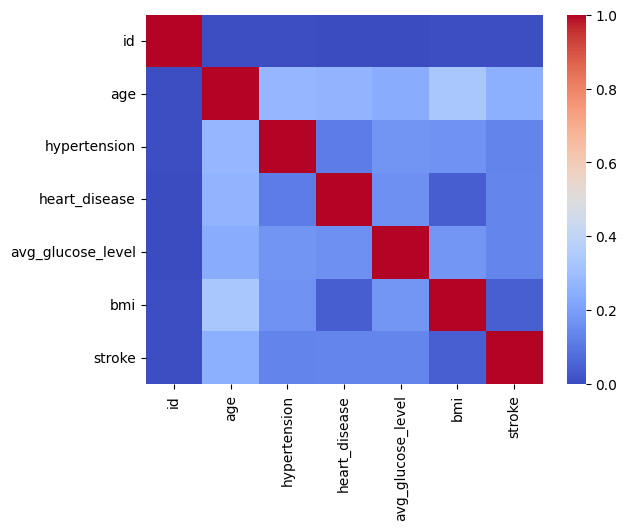

In [18]:
sns.heatmap(data.corr(), cmap='coolwarm')

<h2>Data Preprocessing</h2>

Dropping from the feature columns the columns with low correlation on the target column 

In [19]:
X = data.drop(columns=['id', 'gender','Residence_type', 'bmi', 'stroke'], axis=1)
y = data['stroke']

<h2>Model Evaluation</h2>


In [20]:
from sklearn.compose import make_column_selector as selector

numeric_selector = selector(dtype_exclude=object)
categorical_selector = selector(dtype_include=object)

numerical_column = numeric_selector(X)
categorical_column = categorical_selector(X)

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

Log_reg = LogisticRegression()
preprocessing = ColumnTransformer([('numeric', StandardScaler(), numerical_column),('categorical', OneHotEncoder(),categorical_column)])
model = make_pipeline(preprocessing, Log_reg)

In [22]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, X, y, cv=10, return_train_score=True, n_jobs=2, scoring=['accuracy','balanced_accuracy'])
cv_results = pd.DataFrame(cv_results)
cv_results.head()

,fit_time,score_time,test_accuracy,train_accuracy,test_balanced_accuracy,train_balanced_accuracy
0,0.053967,0.006000,0.951076,0.951294,0.5,0.500000
1,0.058969,0.007000,0.951076,0.951511,0.5,0.502232
2,0.057001,0.004001,0.951076,0.951511,0.5,0.502232
3,0.040998,0.006001,0.951076,0.951511,0.5,0.502232
4,0.048998,0.006006,0.951076,0.951511,0.5,0.502232


In [23]:
X

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status
0,67.0,0,1,Yes,Private,228.69,formerly smoked
1,61.0,0,0,Yes,Self-employed,202.21,never smoked
2,80.0,0,1,Yes,Private,105.92,never smoked
3,49.0,0,0,Yes,Private,171.23,smokes
4,79.0,1,0,Yes,Self-employed,174.12,never smoked
...,...,...,...,...,...,...,...
5105,80.0,1,0,Yes,Private,83.75,never smoked
5106,81.0,0,0,Yes,Self-employed,125.20,never smoked
5107,35.0,0,0,Yes,Self-employed,82.99,never smoked
5108,51.0,0,0,Yes,Private,166.29,formerly smoked


In [24]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['ever_married', 'work_type', 'smoking_status']] = \
X.loc[:,['ever_married', 'work_type', 'smoking_status']].apply(enc.fit_transform)
X.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5016\2756255630.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:,['ever_married', 'work_type', 'smoking_status']] = \


,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status
0,67.0,0,1,1,2,228.69,1
1,61.0,0,0,1,3,202.21,2
2,80.0,0,1,1,2,105.92,2
3,49.0,0,0,1,2,171.23,3
4,79.0,1,0,1,3,174.12,2


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, roc_curve,precision_recall_curve, auc,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.impute import KNNImputer

from xgboost import XGBClassifier


In [29]:
def run_exp_on_feature(x_train,y_train,x_test,y_test):

    models= [['Logistic Regression ',LogisticRegression()],
            ['KNearest Neighbor ',KNeighborsClassifier()],
            ['Decision Tree Classifier ',DecisionTreeClassifier()],
            ['Random Forest Classifier ',RandomForestClassifier()],
            ['Ada Boost ',AdaBoostClassifier()],
            ['SVM ',SVC()],
            ['XG Boost',XGBClassifier()]]

    models_score = []
    for name,model in models:

        model = model
        model.fit(x_train,y_train)
        model_pred = model.predict(x_test)
        cm_model = confusion_matrix(y_test, model_pred)
        print(cm_model)
        models_score.append(accuracy_score(y_test,model.predict(x_test)))

        print(name)
        print('Validation Acuuracy: ',accuracy_score(y_test,model.predict(x_test)))
        print('Training Accuracy: ',accuracy_score(y_train,model.predict(x_train)))
        print('############################################')
        
        
    return models_score

In [30]:
models_score = run_exp_on_feature(X_train,y_train,X_test,y_test)

[[1591    0]
 [  96    0]]
Logistic Regression 
Validation Acuuracy:  0.943094250148192
Training Accuracy:  0.9553023663453112
############################################
[[1579   12]
 [  94    2]]
KNearest Neighbor 
Validation Acuuracy:  0.9371665678719621
Training Accuracy:  0.9561787905346187
############################################
[[1516   75]
 [  83   13]]
Decision Tree Classifier 
Validation Acuuracy:  0.9063426200355661
Training Accuracy:  1.0
############################################
[[1583    8]
 [  93    3]]
Random Forest Classifier 
Validation Acuuracy:  0.940130409010077
Training Accuracy:  1.0
############################################
[[1588    3]
 [  96    0]]
Ada Boost 
Validation Acuuracy:  0.941315945465323
Training Accuracy:  0.9558866491381829
############################################
[[1591    0]
 [  96    0]]
SVM 
Validation Acuuracy:  0.943094250148192
Training Accuracy:  0.9553023663453112
############################################
[[1578   13]
 

In [87]:
model = XGBClassifier(colsample_bytree=0.8, learning_rate= 0.1, max_depth=3, subsample= 0.9)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [73]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost classifier
xgb_model = XGBClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameter combination and its corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)



Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.9}
Best Accuracy: 0.9553028556793443


In [88]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))
pd.crosstab(y_test, y_predict)

0.942501481920569


col_0,0,1
stroke,,
0,1590,1
1,96,0


In [89]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=12)

In [90]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [91]:
from collections import Counter
print("Before Smoting:", Counter(y_train))
print("After Smoting:", Counter(y_train_smote))

Before Smoting: Counter({0: 3270, 1: 153})
After Smoting: Counter({0: 3270, 1: 3270})


In [86]:
model.fit(X_train_smote, y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict))
pd.crosstab(y_test, y_predict)

0.91701244813278


col_0,0,1
stroke,,
0,1536,55
1,85,11


Comparing the accuracy with the balanced accuracy, it's obvious that the dataset is imbalanced. To get better results, the dataset should include more samples of people who had strokes.